In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


## 1

In [4]:
p1 = '/content/drive/MyDrive/preds.csv'
p3 = '/content/drive/MyDrive/preds_multilabel_2.csv'
p2 = '/content/drive/MyDrive/preds_binary-5.csv'

In [6]:
df1, df2, df3 = pd.read_csv(p1), pd.read_csv(p2), pd.read_csv(p3)

In [7]:
labels = [str(i) for i in range(1, 5)] + [str(i) for i in range(7, 11)]

In [8]:
labels

['1', '2', '3', '4', '7', '8', '9', '10']

In [29]:
def confmap(df, labels):
    pred, true = df["pred_label"].to_numpy(), df["true_label"].to_numpy()
    cm = confusion_matrix(true, pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=labels)
    disp.plot(cmap='RdPu');

In [13]:
df1

,pred_label,true_label
0,7,9
1,7,6
2,2,0
3,9,9
4,7,6
...,...,...
495,2,3
496,0,3
497,9,9
498,0,0


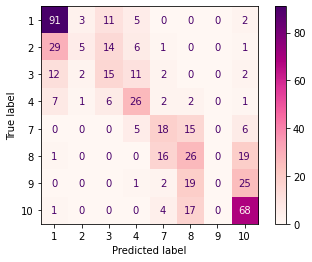

In [14]:
confmap(df1, labels)

In [15]:
df2

,true_10,true_3,pred_10,pred_3
0,6,1,6,1
1,7,1,2,0
2,6,1,6,1
3,9,1,8,1
4,7,1,9,1
...,...,...,...,...
495,3,0,9,1
496,9,1,9,1
497,2,0,7,1
498,6,1,6,1


In [37]:
def confmap(df, labels):
    pred, true = df["pred_10"].to_numpy(), df["true_10"].to_numpy()
    cm = confusion_matrix(true, pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=labels)
    disp.plot(cmap='RdPu');

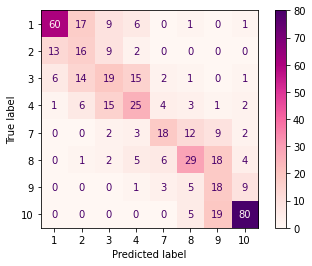

In [17]:
confmap(df2, labels)

In [18]:
df3

,true_10,true_3,pred_10,pred_3
0,6,1,6,1
1,7,1,2,0
2,6,1,7,1
3,9,1,8,1
4,7,1,8,1
...,...,...,...,...
495,3,0,7,1
496,9,1,8,1
497,2,0,1,0
498,6,1,7,1


In [ ]:
!pip install cmasher

In [25]:
import cmasher as cmr
cmap = cmr.get_sub_cmap('RdPu', 0.0, 0.6)

In [36]:
def confmap(df, labels):
    pred, true = df["pred_10"].to_numpy(), df["true_10"].to_numpy()
    cm = confusion_matrix(true, pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=labels)
    disp.plot(cmap=cmap);

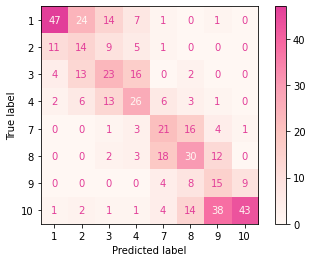

In [26]:
confmap(df3, labels)

## 2

## 3

In [31]:
def to_pos_neg(x):
    if 0 <= x <= 3:
        return 0
    elif 6 <= x <= 9:
        return 1
    else:
        return 2

In [28]:
def get_plot_2(df):
    df_binary = df.applymap(func=to_pos_neg)
    confmap(df_binary, ['0', '1'])
    return 

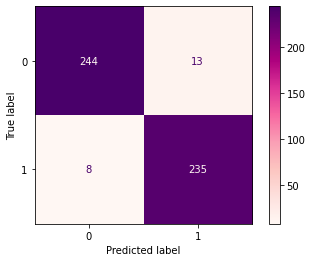

In [32]:
 get_plot_2(df1)

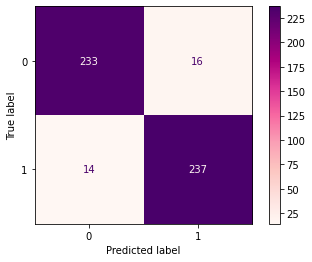

In [35]:
 get_plot_2(df2)

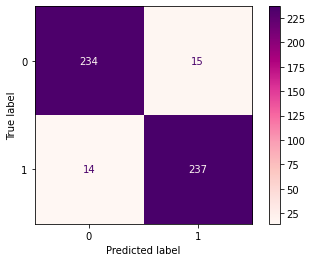

In [38]:
 get_plot_2(df3)

## dataset stats

In [ ]:
train_path = '/content/drive/My Drive/datasets/IMDB/IMDB_train.csv'
test_path = '/content/drive/My Drive/datasets/IMDB/IMDB_test.csv'

In [ ]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

In [ ]:
df_train.head(0)

In [ ]:
train_counts = df_train.star_label.value_counts().to_frame()

In [ ]:
train_counts

In [ ]:
ax = train_counts.plot(kind='bar');
ax.bar_label(ax.containers[0], label_type='edge');
ax.margins(y=0.1)

In [ ]:
train_counts = df_train.star_label.value_counts().to_frame()
train_counts.index += 1

In [ ]:
ax = test_counts.plot(kind='bar');
ax.bar_label(ax.containers[0], label_type='edge');
ax.margins(y=0.1)

In [ ]:
df = df.applymap(lambda x: x + 1)

In [ ]:
ax = df.true_label.value_counts().plot(kind='bar');
ax.bar_label(ax.containers[0], label_type='edge');
ax.margins(y=0.1)

In [ ]:
ax = df.pred_label.value_counts().plot(kind='bar');
ax.bar_label(ax.containers[0], label_type='edge');
ax.margins(y=0.1)